# Step 3: Multivariate Normal Distribution

## SETUP

In [ ]:
!wget https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/main/step03/height_weight.txt

## numpy_basis.py

In [1]:
import numpy as np

# array
x = np.array([1, 2, 3])
print(x.__class__)
print(x.shape)
print(x.ndim)
W = np.array([[1, 2, 3],
              [4, 5, 6]])
print(W.ndim)
print(W.shape)

# element-wise operation
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])
print(W + X)
print('---')
print(W * X)

# inner product
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
y = np.dot(a, b)  # a @ b
print(y)

# matrix multiplication
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
Y = np.dot(A, B)  # A @ B
print(Y)

<class 'numpy.ndarray'>
(3,)
1
2
(2, 3)
[[ 1  3  5]
 [ 7  9 11]]
---
[[ 0  2  6]
 [12 20 30]]
32
[[19 22]
 [43 50]]


## numpy_matrix.py

In [2]:
import numpy as np

# transpose
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)
print('---')
print(A.T)

# determinant
A = np.array([[3, 4], [5, 6]])
d = np.linalg.det(A)
print(d)

# inverse matrix
A = np.array([[0.5, 1.0], [2.0, 3.0]])
B = np.linalg.inv(A)
print(B)
print('---')
print(A @ B)

# multivariate normal distribution
def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

x = np.array([0, 0])
mu = np.array([1, 2])
cov = np.array([[1, 0],
               [0, 1]])

y = multivariate_normal(x, mu, cov)
print(y)

[[1 2 3]
 [4 5 6]]
---
[[1 4]
 [2 5]
 [3 6]]
-1.9999999999999971
[[-6.  2.]
 [ 4. -1.]]
---
[[1. 0.]
 [0. 1.]]
0.013064233284684921


## plot_3d.py

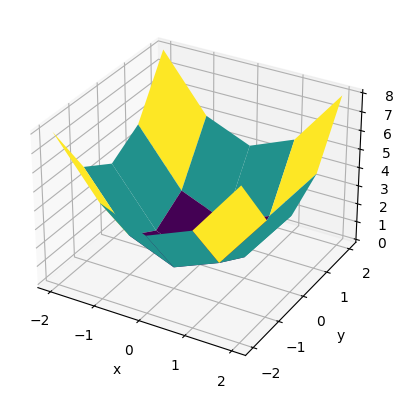

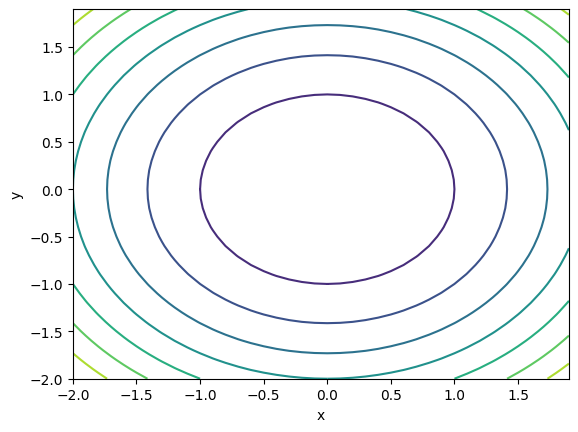

In [3]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([[-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2],
              [-2, -1, 0, 1, 2]])
Y = np.array([[-2, -2, -2, -2, -2],
              [-1, -1, -1, -1, -1],
              [0, 0, 0, 0, 0],
              [1, 1, 1, 1, 1],
              [2, 2, 2, 2, 2]])

# ===== better resolution =====
# x = y = np.arange(-2, 2, 0.1)
# X, Y = np.meshgrid(x, y)
# =============================

Z = X ** 2 + Y ** 2

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# ===== plot contour =====
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(x, y)
Z = X ** 2 + Y ** 2

ax = plt.axes()
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## plot_norm.py

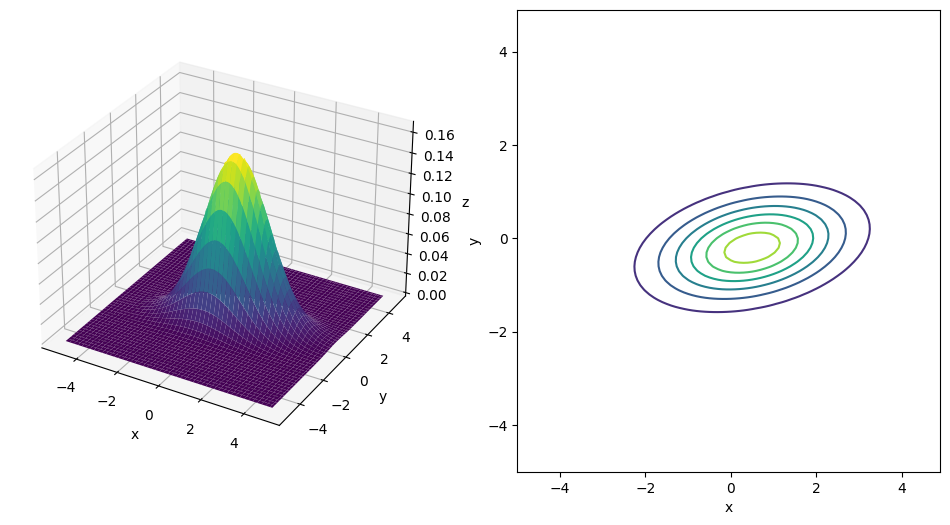

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3],
                [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)
plt.show()


## plot_dataset.py

(25000, 2)


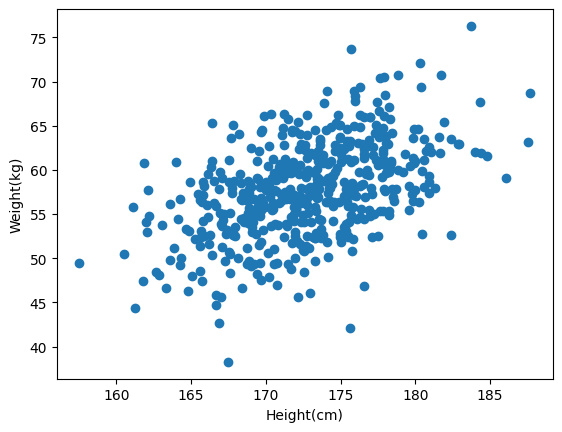

In [6]:
import numpy as np
import matplotlib.pyplot as plt

path = 'height_weight.txt'
xs = np.loadtxt(path)

print(xs.shape)

small_xs = xs[:500]
plt.scatter(small_xs[:, 0], small_xs[:, 1])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

## mle.py

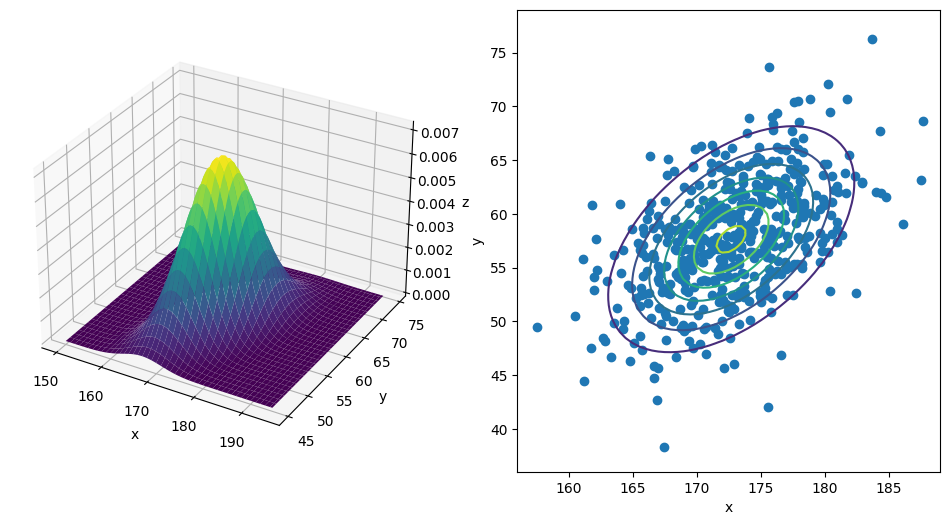

In [9]:
import numpy as np
import matplotlib.pyplot as plt

path = 'height_weight.txt'
xs = np.loadtxt(path)

# Maximum Likelihood Estimation(MLE)
mu = np.mean(xs, axis=0)
cov = np.cov(xs, rowvar=False)

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

small_xs = xs[:500]
X, Y = np.meshgrid(np.arange(150, 195, 0.5),
                   np.arange(45, 75, 0.5))
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(small_xs[:,0], small_xs[:,1])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim(156, 189)
ax2.set_ylim(36, 79)
ax2.contour(X, Y, Z)
plt.show()